In [1]:
"""Load/import helper functions"""

import time
import random
from LocalPopular import locally_popular_clustering, extract_labels_from_communities

from GraphFunctions import generate_agents, calculate_euclidian_relationships, create_graph, \
    my_make_circles, create_graphs_euclid, create_graphs_kNN, \
    generate_graph,create_graphs_hop_distance, create_graphs_hop_distance_abs

from PlotHelperFunctions import plot_clustering, plot_stuff

from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import rand_score
import numpy as np
import networkx as nx
from scipy.spatial import distance

import data.jazz as jazz


In [2]:
"""Comparing Computing Time """
n= 1000
print('Comparing Computing Time n =',n)

start = time.perf_counter()
agents = generate_agents(n,2)
initial_clustering = {i: i % 5 for i in range(len(agents))}

friend_graph_a,enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)



print('Created Graph (Euclidian relationships):', time.perf_counter() - start, 'seconds')

start = time.perf_counter()
locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='E',use_first_move=True)
print('Created local popular solution using first legal move in', time.perf_counter() - start, 'seconds')
start = time.perf_counter()
locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='E',use_first_move=False)
print('Created local popular solution using best move in', time.perf_counter() - start, 'seconds')


Comparing Computing Time n = 1000
Created Graph (Euclidian relationships): 3.4731789999932516 seconds
1582
Created local popular solution using first legal move in 1.8013460999936797 seconds
902
Created local popular solution using best move in 1.038484899996547 seconds


464
463
466
405
403
414
414
414
409


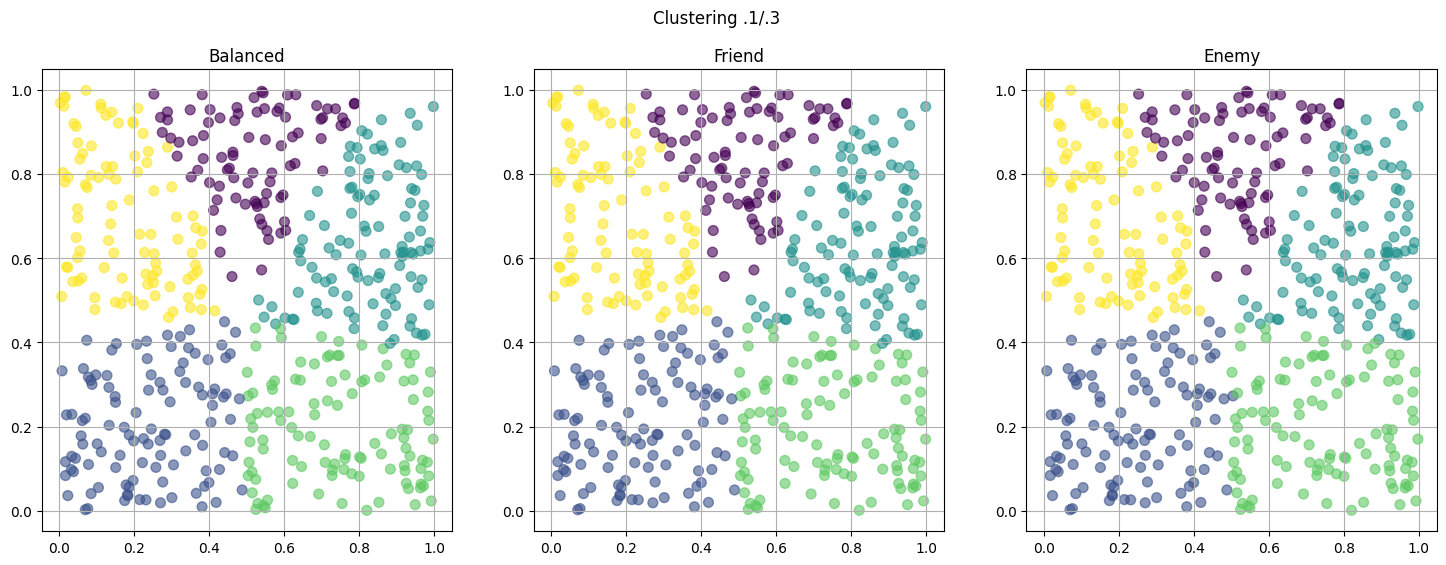

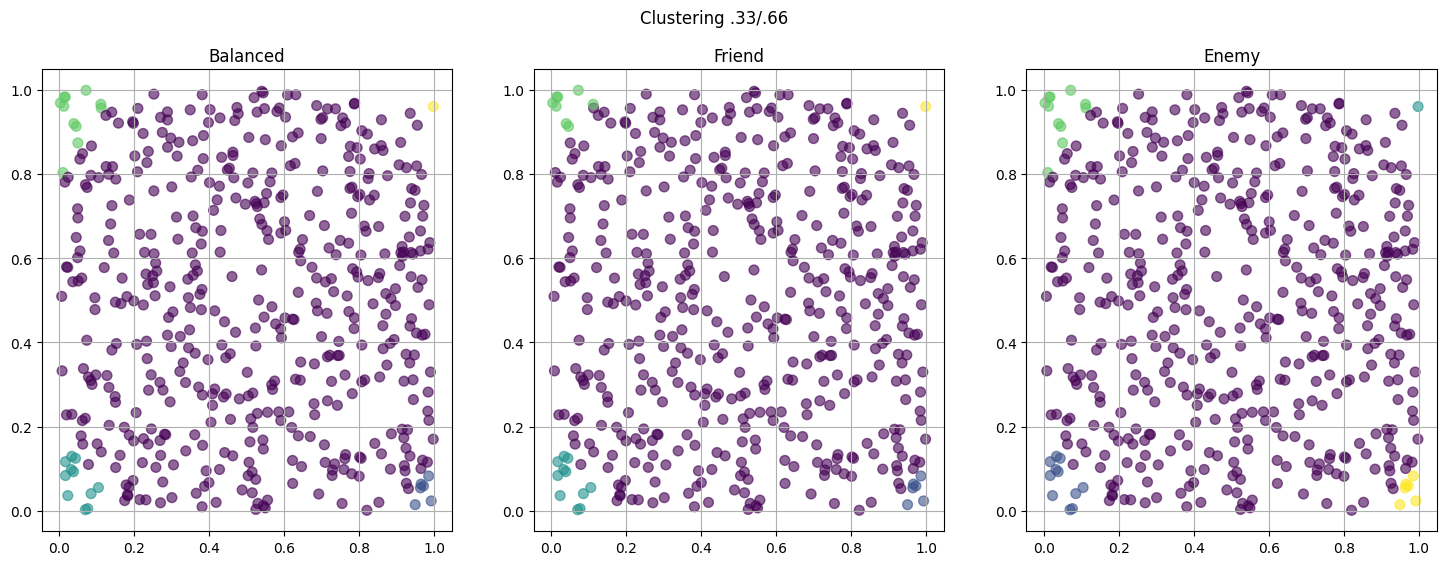

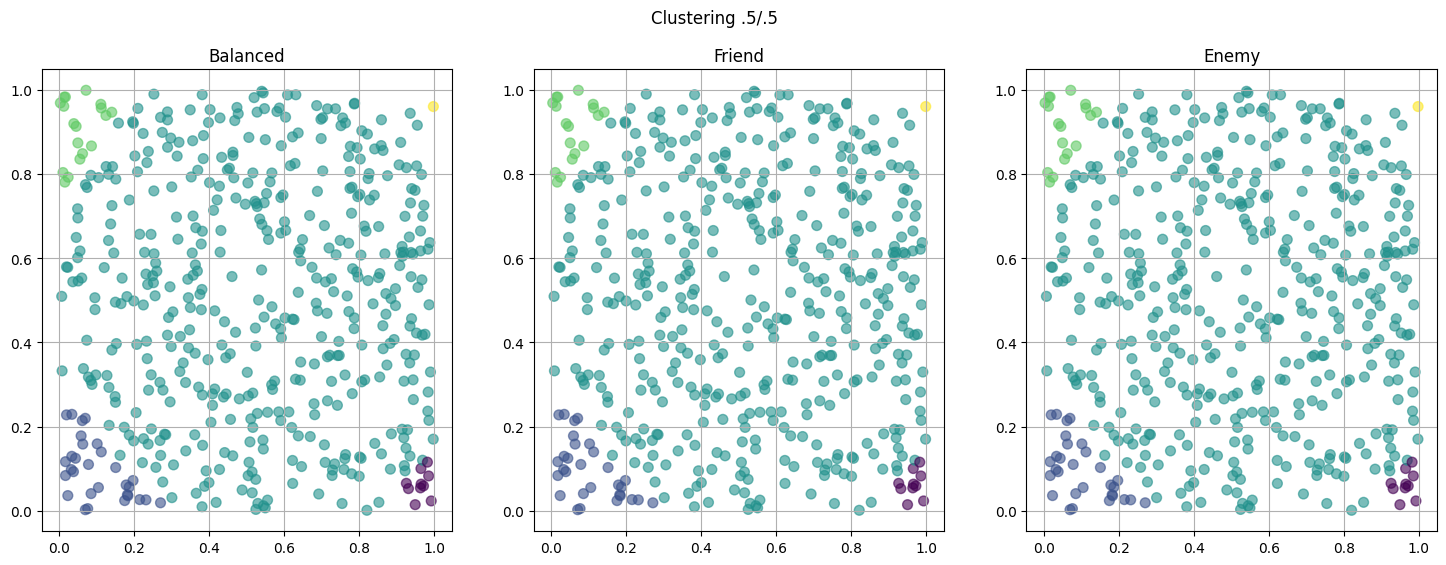

In [3]:
"""Comparing different levels of euclidean relations on noise"""
n=500 # No of Agents
m=5 # No of Coalitions


agents = generate_agents(n,2)
initial_clustering = {i: i % m for i in range(len(agents))}
friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
friend_graph_b, enemy_graph_b = create_graphs_euclid(agents,0.33,0.66)
friend_graph_c, enemy_graph_c = create_graphs_euclid(agents,0.5,0.5)



lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='E')

lp_b_b = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='B')
lp_b_f = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='F')
lp_b_e = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='E')

lp_c_b = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='B')
lp_c_f = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='F')
lp_c_e = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='E')


plot_stuff(agents, lp_a_b, lp_a_f, lp_a_e,"Clustering .1/.3",
           title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_b_b, lp_b_f, lp_b_e,"Clustering .33/.66 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_c_b, lp_c_f, lp_c_e,"Clustering .5/.5 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')




151
151
151
143
143
143
149
149
149


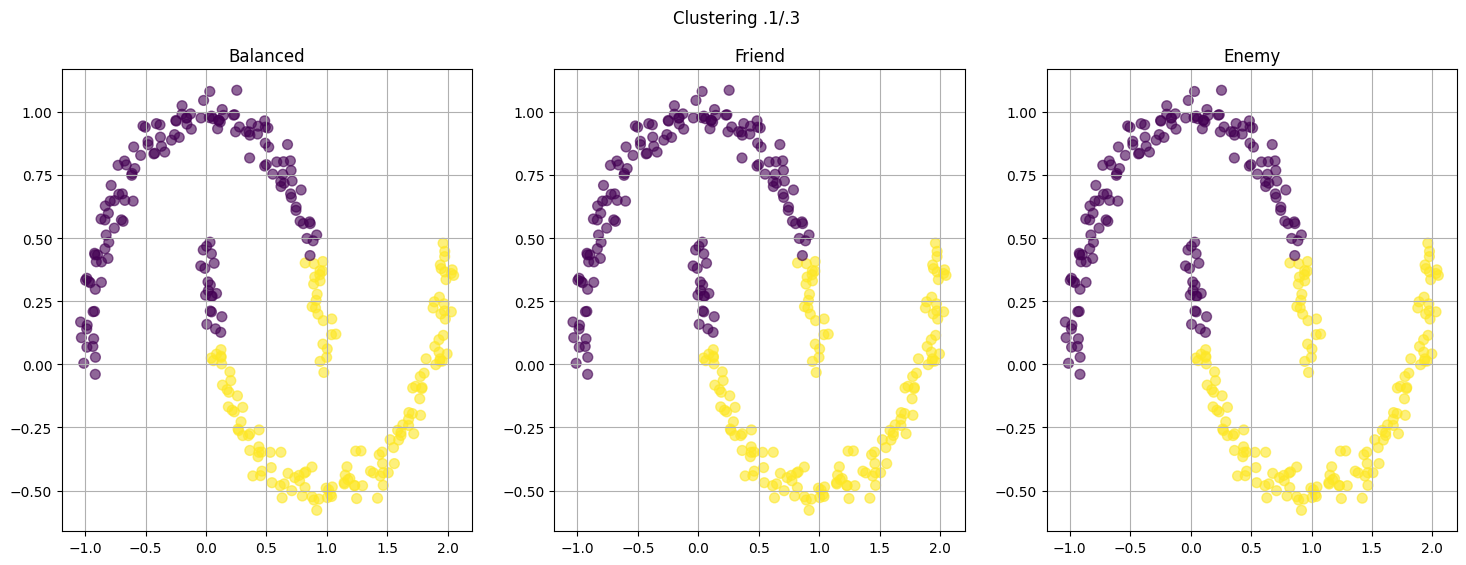

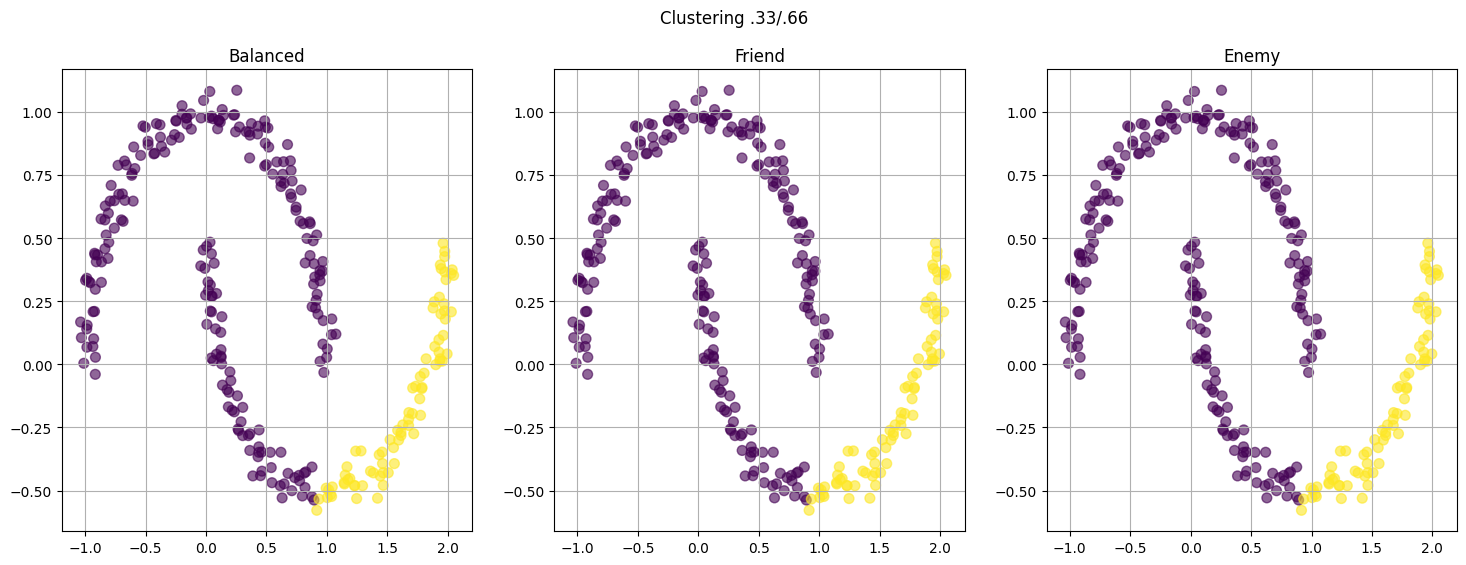

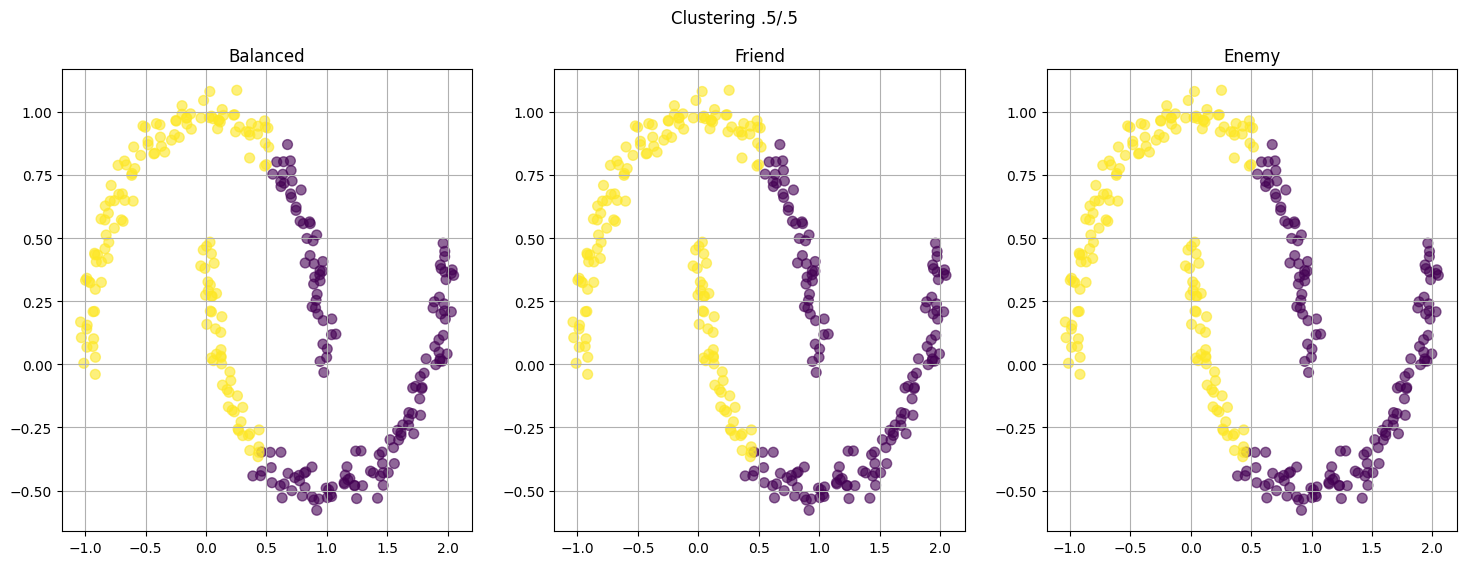

In [4]:
"""Comparing different levels of euclidean relations on moons"""
n=300 # No of Agents
m=2 # No of Coalitions


agents,_ = make_moons(n_samples=n, noise=0.05)
initial_clustering = {i: i % m for i in range(len(agents))}
friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
friend_graph_b, enemy_graph_b = create_graphs_euclid(agents,0.33,0.66)
friend_graph_c, enemy_graph_c = create_graphs_euclid(agents,0.5,0.5)



lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')
lp_a_f = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')
lp_a_e = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='E')

lp_b_b = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='B')
lp_b_f = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='F')
lp_b_e = locally_popular_clustering(agents, friend_graph_b, enemy_graph_b, initial_clustering,mode='E')

lp_c_b = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='B')
lp_c_f = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='F')
lp_c_e = locally_popular_clustering(agents, friend_graph_c, enemy_graph_c, initial_clustering,mode='E')


plot_stuff(agents, lp_a_b, lp_a_f, lp_a_e,"Clustering .1/.3",
           title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_b_b, lp_b_f, lp_b_e,"Clustering .33/.66 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')

plot_stuff(agents, lp_c_b, lp_c_f, lp_c_e,"Clustering .5/.5 ",
            title_1='Balanced', title_2='Friend', title_3='Enemy')


223


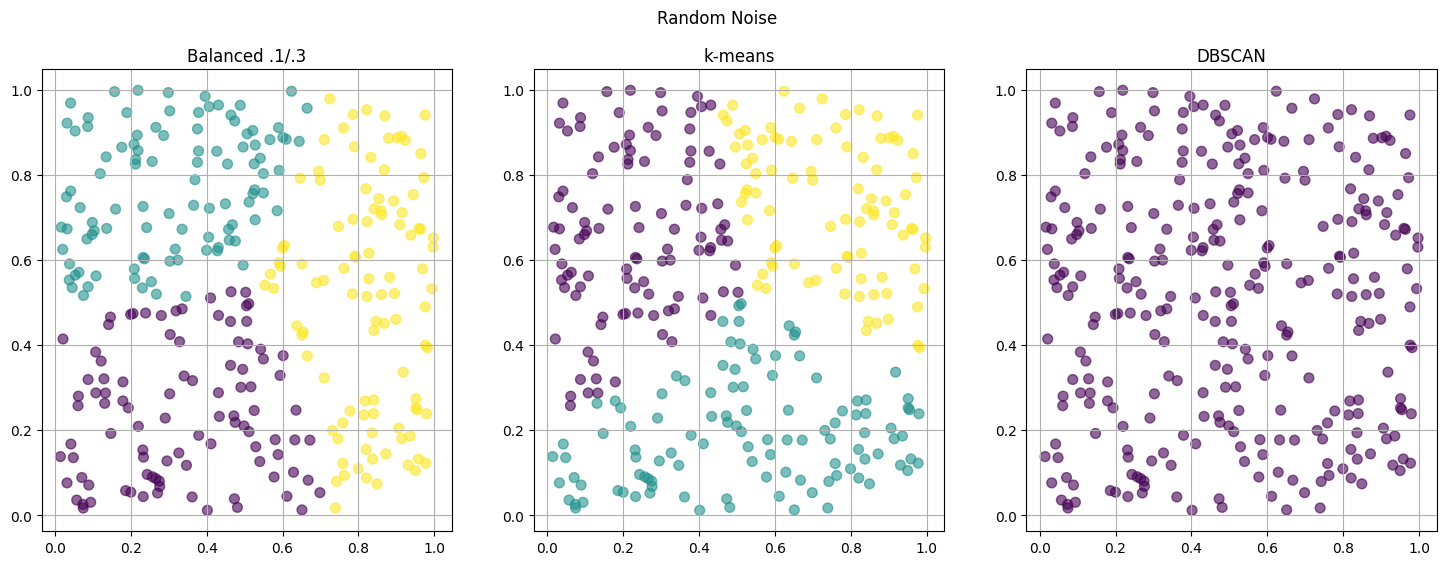

226


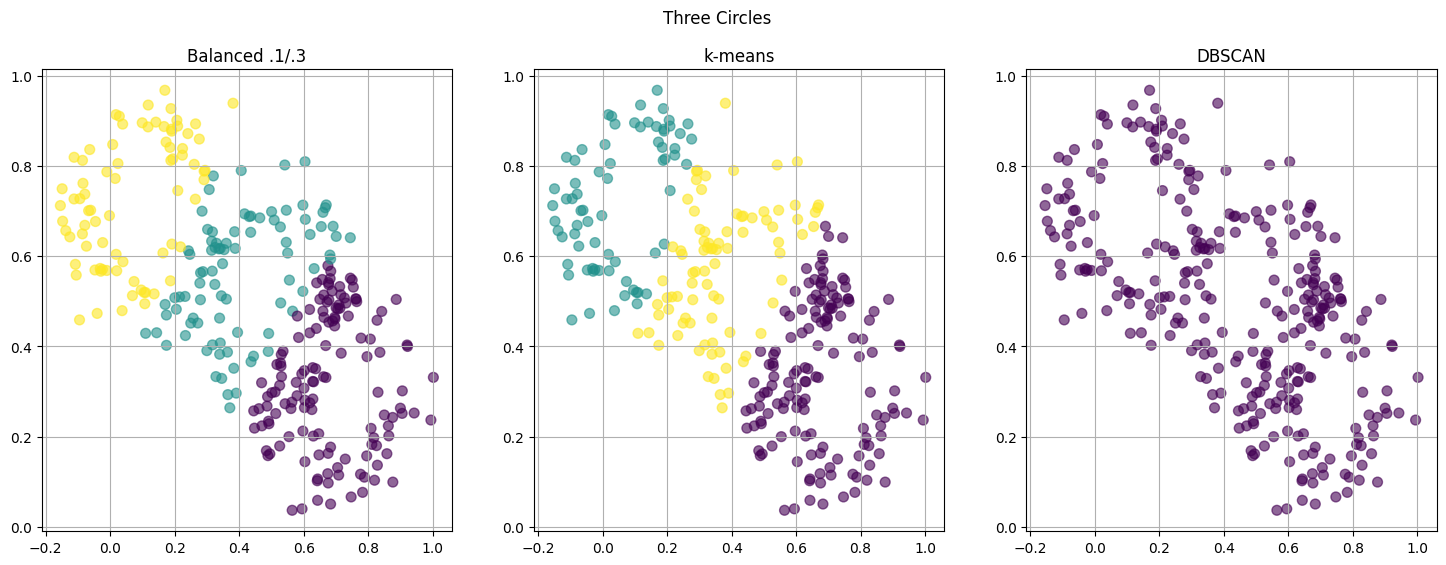

139


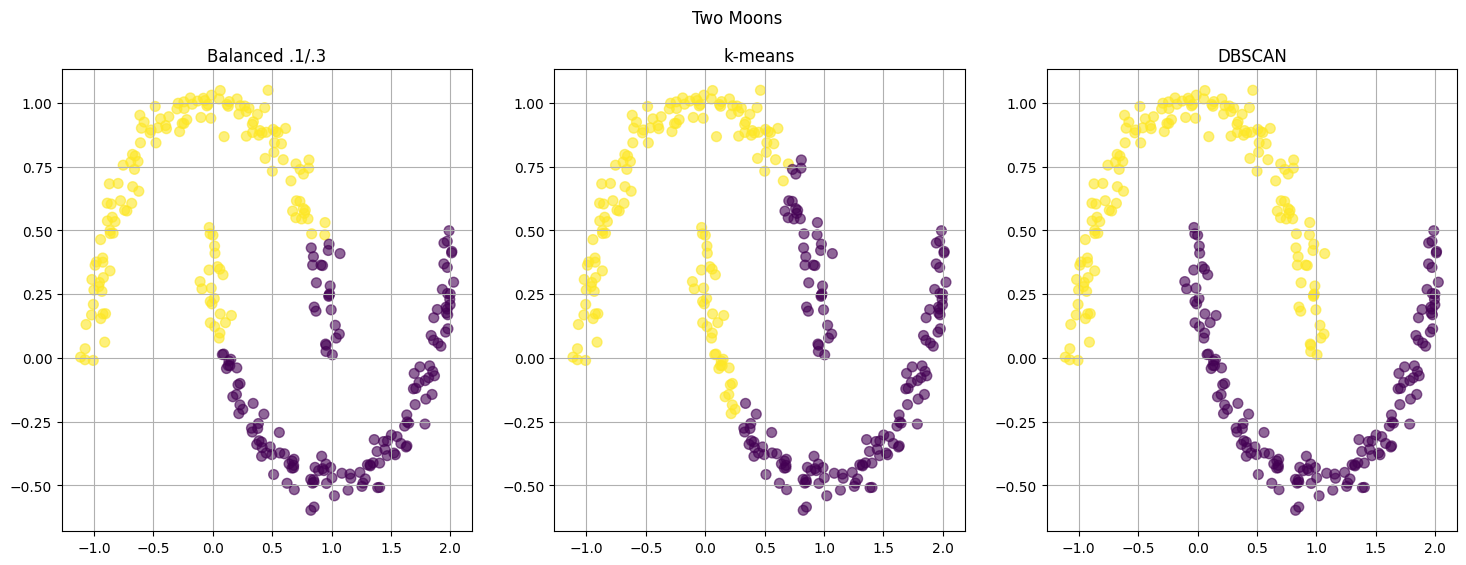

In [5]:
"""Comparing the Balanced-lp-heuristic to k-means and DBSCAN"""
n=300 # No of Agents
m=3 # No of Coalitions
kmeans = KMeans(n_clusters = m)
dbscan = DBSCAN(eps=0.2, min_samples=5)

agents = generate_agents(n,2)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Random Noise",
          title_1='Balanced .1/.3', title_2='k-means', title_3='DBSCAN')


agents = my_make_circles(n)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)

lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Three Circles",
          title_1='Balanced .1/.3', title_2='k-means', title_3='DBSCAN')

n=300 # No of Agents
m=2 # No of Coalitions
kmeans = KMeans(n_clusters = m)

agents,_ = make_moons(n_samples=n, noise=0.05)


kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}

friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='B')

plot_stuff(agents,lp_a_b, kmeans_labels, dbscan_labels, title="Two Moons",
          title_1='Balanced .1/.3', title_2='k-means', title_3='DBSCAN')

237


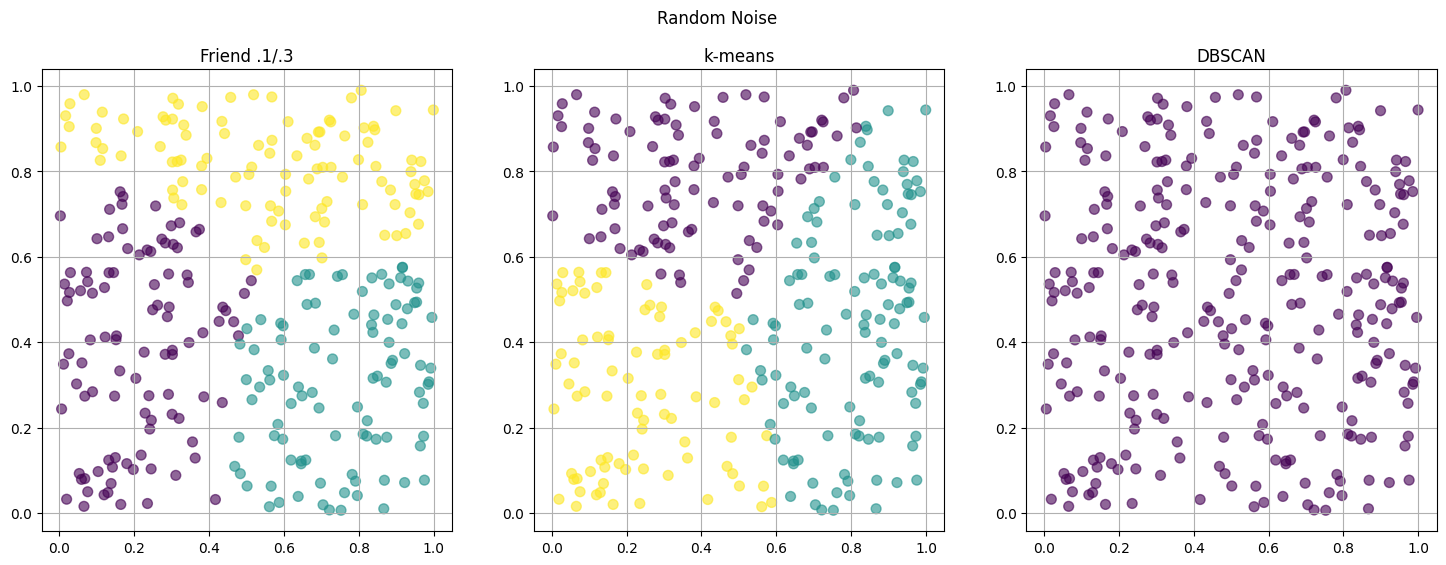

232


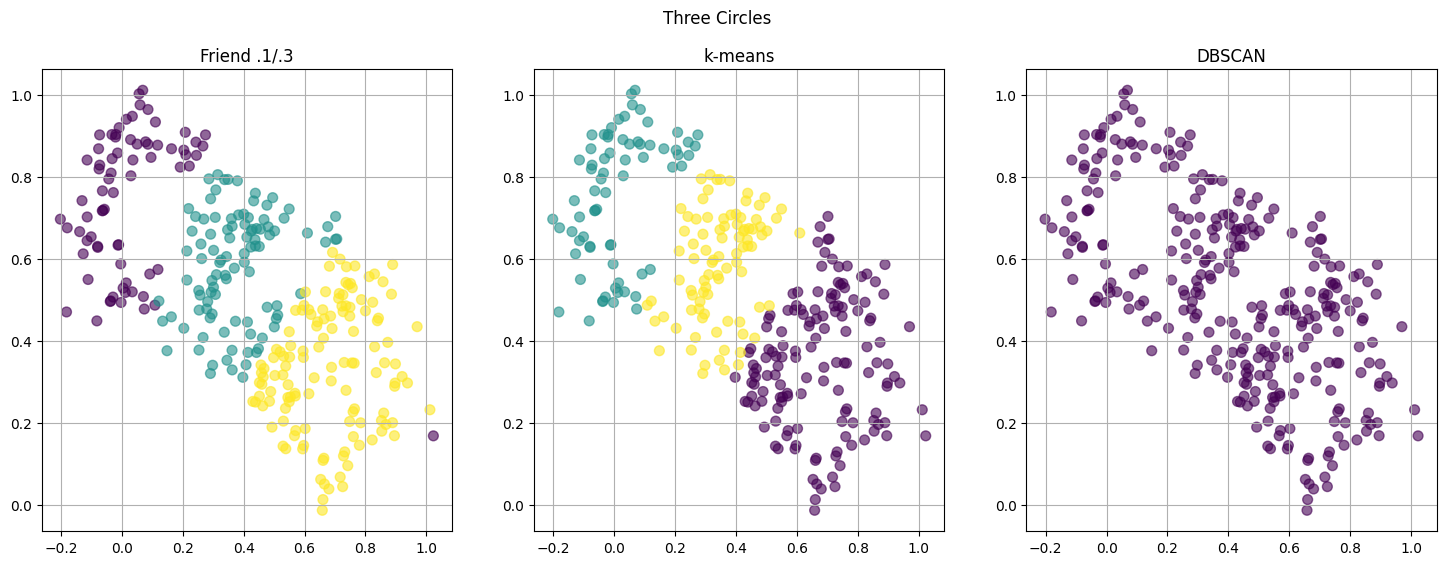

155


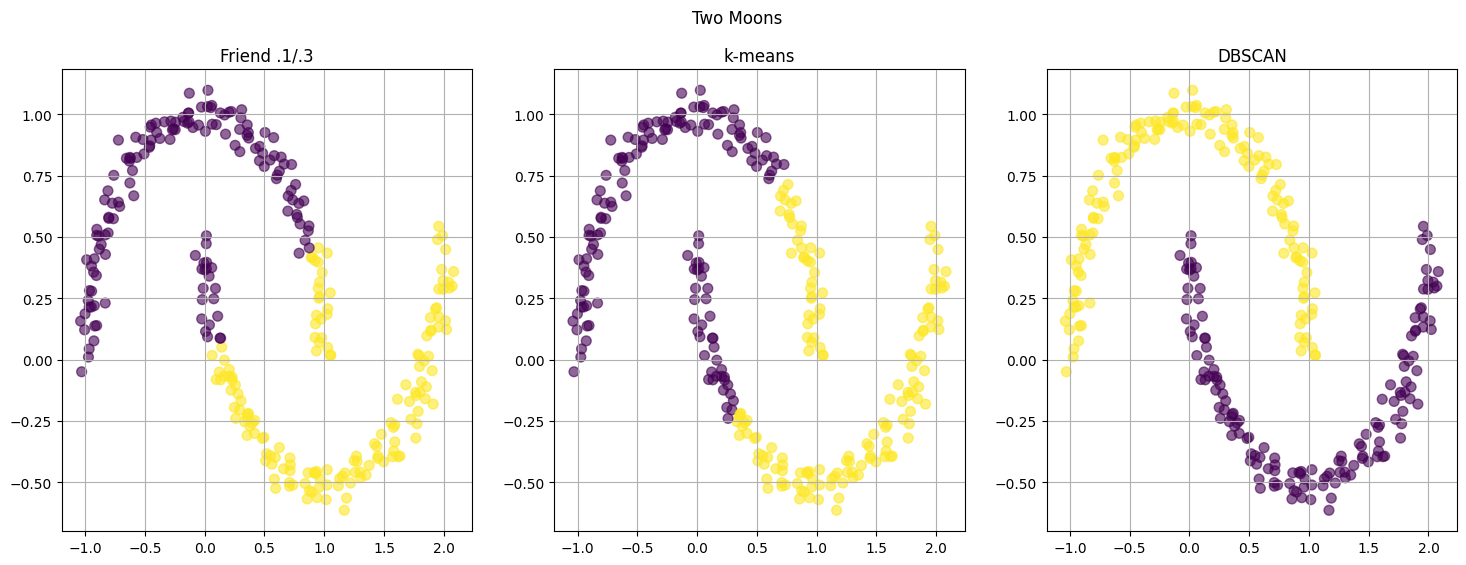

In [6]:
"""Comparing the Friend-lp-heuristic to k-means and DBSCAN"""
n=300 # No of Agents
m=3 # No of Coalitions
kmeans = KMeans(n_clusters = m)
dbscan = DBSCAN(eps=0.2, min_samples=5)

agents = generate_agents(n,2)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Random Noise",
          title_1='Friend .1/.3', title_2='k-means', title_3='DBSCAN')


agents = my_make_circles(n)

kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}


friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)

lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')

plot_stuff(agents, lp_a_b, kmeans_labels, dbscan_labels,"Three Circles",
          title_1='Friend .1/.3', title_2='k-means', title_3='DBSCAN')

n=300 # No of Agents
m=2 # No of Coalitions
kmeans = KMeans(n_clusters = m)

agents,_ = make_moons(n_samples=n, noise=0.05)


kmeans_labels = kmeans.fit_predict(agents)
dbscan_labels = dbscan.fit_predict(agents)
initial_clustering = {i: i%m for i in range(n)}

friend_graph_a, enemy_graph_a = create_graphs_euclid(agents,0.1,0.3)
lp_a_b = locally_popular_clustering(agents, friend_graph_a, enemy_graph_a, initial_clustering,mode='F')

plot_stuff(agents,lp_a_b, kmeans_labels, dbscan_labels, title="Two Moons",
          title_1='Friend .1/.3', title_2='k-means', title_3='DBSCAN')